In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('GPU Available')
else:
    print("Please install GPU version of TF")

GPU Available


In [57]:
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [58]:
# converted time into 24 hour format
raw_df["Time"] = raw_df["Time"].apply(lambda x : x / 3600 % 24)
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,1.453795e+01,5.847061,0.000000,10.598194,15.010833,19.329722,23.999444
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Text(0.5, 1.0, 'HeatMap for dataset')

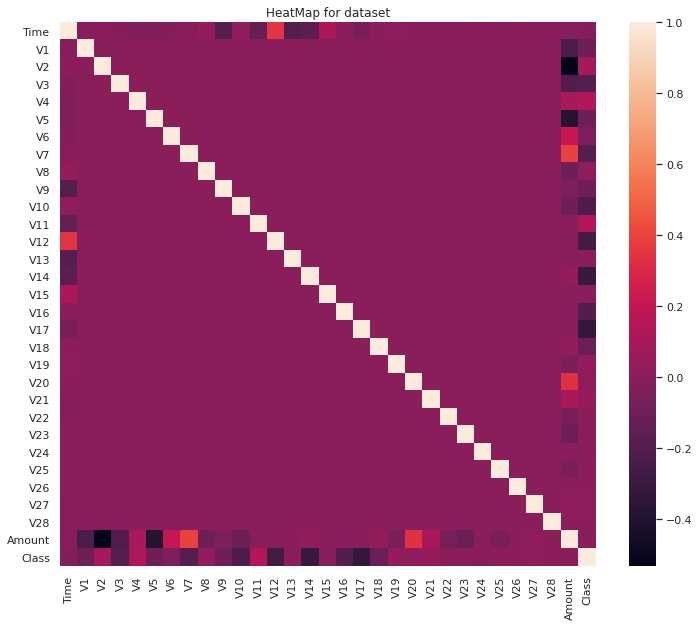

In [60]:
corr = raw_df.corr()

# plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns).set_title('HeatMap for dataset')

In [61]:
# computing the classes percentage for the two classes
vc = raw_df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(raw_df), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


Here we can clearly see that the two classes are highly imbalanced as the distribtion has a variation of over 99 percent.

In [69]:
train_df, test_df = train_test_split(raw_df, test_size=0.2)

In [70]:
train_ys=train_df['Class']

train_df.drop('Class',1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212147,14.537500,-0.797734,-0.373660,1.078937,-0.861979,1.048877,0.961050,-0.026181,0.429955,-0.902134,-0.043656,-1.102052,0.223003,-0.233998,-0.341891,-2.569110,-1.266158,-0.656438,1.415903,-0.540980,-0.421810,-0.783891,-1.891879,0.139497,-0.557748,-0.158975,-1.180503,0.150492,0.152802,38.60
265919,21.029444,2.042124,-0.143815,-2.954824,-0.579160,2.610335,3.142285,-0.418197,0.784650,0.360019,-0.350614,0.329637,0.183467,-0.273095,-0.597661,0.583772,0.178545,0.473869,-0.499053,-0.139782,-0.122730,-0.352934,-0.996414,0.364357,0.604776,-0.264196,0.219776,-0.039022,-0.042959,0.99
250404,19.024722,-0.241606,-0.661264,2.642449,-1.914371,-1.379921,0.166087,-0.680519,-0.094861,-1.726807,0.970306,-1.016807,-1.147993,0.842803,-1.225312,0.519327,-0.717735,0.656111,0.442947,0.764532,0.007024,-0.170200,0.162097,-0.240881,-0.090324,0.093539,0.036454,-0.040446,-0.140561,32.00
282768,23.536944,-0.906405,0.605858,0.421609,-1.673046,0.233206,-0.472129,0.417403,0.268958,-2.127520,-0.138552,-0.096044,0.333036,0.565589,0.471640,-1.232819,-1.470212,-0.251753,1.806509,-0.406263,-0.508959,0.047237,0.534966,-0.696021,-0.401845,1.102230,1.142810,-0.169301,-0.065721,6.65
180972,10.658889,-0.886304,1.805230,-3.142006,-1.060446,3.016086,2.800240,-0.184654,1.567429,-0.655380,-1.974054,0.432335,-0.370786,-0.285767,-1.780190,1.217112,0.700188,2.080886,1.459246,-0.478970,-0.221753,0.353401,0.684964,-0.144573,0.487191,-0.429352,-0.160928,-0.250188,0.145470,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189442,11.667222,-0.871030,0.222825,0.941452,-3.794018,0.097393,-1.443633,1.302015,-0.229790,1.370292,-2.637110,-1.109323,-0.000272,-1.119128,0.293279,0.310446,-0.627954,-0.540502,0.137161,-0.049521,-0.142967,0.044139,0.100537,-0.454635,-0.128191,1.150364,-0.890739,0.009608,0.042074,61.25
169912,9.312500,0.150307,0.882528,-0.485898,-0.554017,1.061819,-0.838354,1.166398,-0.385373,0.250878,-0.455665,-0.655827,-0.235263,-0.080866,-1.234742,-0.241264,0.251078,0.224509,-0.227387,-0.236991,0.039142,-0.350215,-0.709759,0.137658,0.559620,-0.802328,0.013539,-0.001458,-0.096813,21.56
64607,14.228611,1.551321,-1.014356,0.220956,-1.429462,-1.375200,-0.763406,-0.965225,-0.180179,-1.705416,1.461653,-1.041924,-1.414766,-0.115754,-0.197307,0.680059,-0.223568,0.368279,0.206337,-0.052829,-0.354916,-0.254284,-0.372496,-0.019825,-0.156923,0.429488,-0.173059,0.024509,0.014641,15.00
129133,21.935000,0.984413,-1.226978,0.160525,-1.403027,-0.861102,0.354107,-0.583555,0.204462,2.082891,-1.185406,-0.205372,0.919314,-0.546363,-0.161134,-0.219856,-0.253604,-0.381012,0.706819,1.868014,0.245048,-0.131284,-0.440930,-0.307436,-0.911336,0.479849,-0.054465,0.010444,0.027528,168.87


In [71]:
train_df.shape

(227845, 31)

In [72]:
train_x, val_x, train_y, val_y = train_test_split(train_df, train_ys, test_size=0.25)
clf = LogisticRegression().fit(train_x, train_y)
pred_y = clf.predict(val_x)
print (classification_report(val_y, pred_y))
print (accuracy_score(val_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.82      0.62      0.71       104

    accuracy                           1.00     56962
   macro avg       0.91      0.81      0.85     56962
weighted avg       1.00      1.00      1.00     56962

0.9990695551420246


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Here we can clearly see that the linear logistic regression is simply classifying everything as non-fraud due to the imbalance class distribution and still manages to get an accuracy of 99.99 percent but the F1-score for the fraud case is at around 0.71 (70 percent approx) which is ignored in the big picture because of the number of valid cards.

In [56]:
non_fraud = raw_df[raw_df['Class'] == 0].sample(500)
fraud = raw_df[raw_df['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

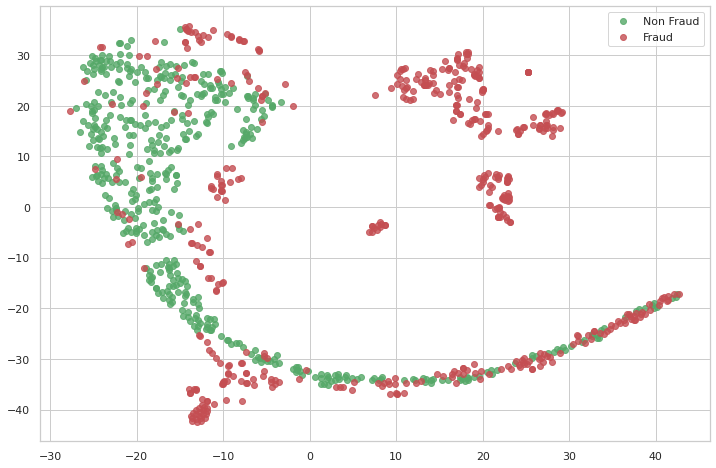

In [9]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=21)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

In [10]:
def make_model():
## input layer 
  input_layer = Input(shape=(X.shape[1],))

  ## encoding part
  encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
  encoded = Dense(50, activation='relu')(encoded)

  ## decoding part
  decoded = Dense(50, activation='tanh')(encoded)
  decoded = Dense(100, activation='tanh')(decoded)

  ## output layer
  output_layer = Dense(X.shape[1], activation='relu')(decoded)
  autoencoder = Model(input_layer, output_layer)
  autoencoder.compile(optimizer="adadelta", loss="mse")

  return autoencoder

In [11]:
model=make_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
Total params: 18,830
Trainable params: 18,830
Non-trainable params: 0
__________________________________________________

In [12]:
x = raw_df.drop(["Class"], axis=1)
y = raw_df["Class"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [27]:
history=model.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 200, 
                shuffle = True, validation_split = 0.20)

Epoch 1/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1952 - val_loss: 0.1943
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1948 - val_loss: 0.1939
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1944 - val_loss: 0.1935
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1940 - val_loss: 0.1931
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1935 - val_loss: 0.1927
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1931 - val_loss: 0.1923
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1927 - val_loss: 0.1919
Epoch 8/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1923 - val_loss: 0.1914
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1919 - val_loss: 0.1910
Epoch 10/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1915 - val_loss: 0.1906
Epoch 11/200
7/7 [===========

In [29]:
hidden_representation = Sequential()
hidden_representation.add(model.layers[0])
hidden_representation.add(model.layers[1])
hidden_representation.add(model.layers[2])

In [30]:
norm_hid_rep = hidden_representation.predict(x_norm[:3000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

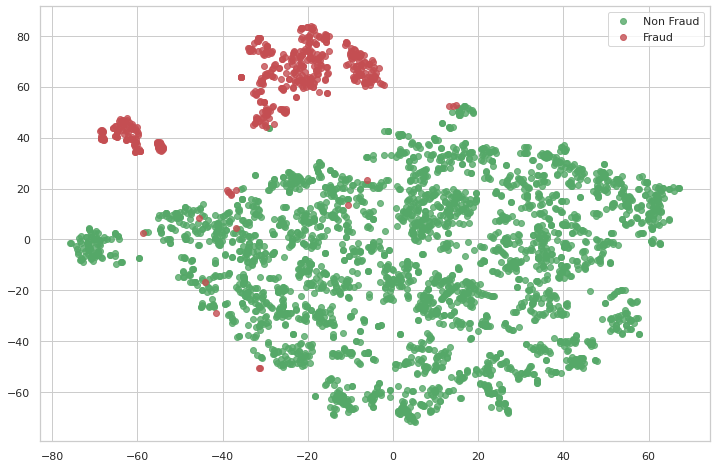

In [31]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

### Understanding useful metrics

Notice that there are a few metrics defined above that can be computed by the model that will be helpful when evaluating the performance.



*   **False** negatives and **false** positives are samples that were **incorrectly** classified
*   **True** negatives and **true** positives are samples that were **correctly** classified
*   **Accuracy** is the percentage of examples correctly classified
>   $\frac{\text{true samples}}{\text{total samples}}$
*   **Precision** is the percentage of **predicted** positives that were correctly classified
>   $\frac{\text{true positives}}{\text{true positives + false positives}}$
*   **Recall** is the percentage of **actual** positives that were correctly classified
>   $\frac{\text{true positives}}{\text{true positives + false negatives}}$

Note: Accuracy is not a helpful metric for this task. You can get 99.8%+ accuracy on this task by predicting False all the time which was done in the previous case.  

Read more:
*  [True vs. False and Positive vs. Negative](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative)
*  [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy)
*   [Precision and Recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)

In [44]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("Classification Report: ")
print (classification_report(val_y, pred_y))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       759
         1.0       1.00      0.87      0.93       114

    accuracy                           0.98       873
   macro avg       0.99      0.93      0.96       873
weighted avg       0.98      0.98      0.98       873

Accuracy Score:  0.9828178694158075


From the above example we can clearly see that there is a huge improvement in the performance of the logistic regression algorithm as it is now converging around 0.93 F1-score for fraud case.The overall accuracy is a bit on the lower side as compared to the previous scenario which is due to the fact that some boundary line valid cards are also being considered as fraud(which in the real world is not that big a problem as a fraud being considered fair).Thus the performance here is significantly better.

In [33]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'], label='Val '+label,linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

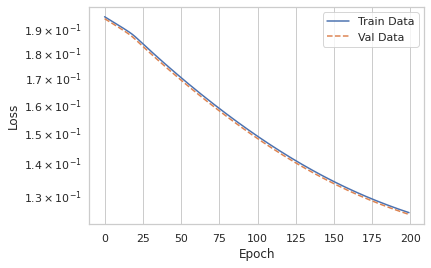

In [34]:
plot_loss(history, "Data", 0)